In [1]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch

/mnt/storage/.cache/python/deps/virtualenvs/mnist-classifier-yOPkbvoS-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [28]:
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("tonyassi/celebrity-1000", trust_remote_code=True)

image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("/home/hcbarden/projects/celeb-classifier/celeb_classifier/results/checkpoint-200", local_files_only=True)


Andie MacDowell


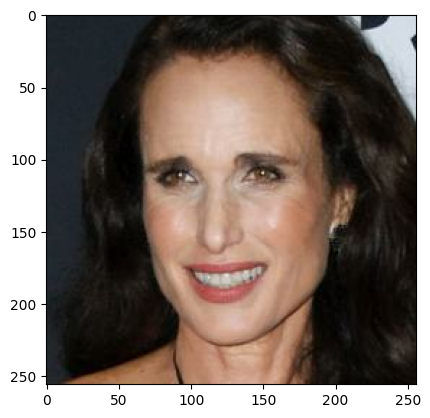

In [38]:
index = 890

image = dataset["train"]["image"][index] # type: ignore

# plot the image
import matplotlib.pyplot as plt
plt.imshow(image)

# actual label
print(model.config.id2label[dataset["train"]["label"][index]])

In [36]:
inputs = image_processor(image, return_tensors="pt")
with torch.no_grad():

    logits = model(**inputs).logits
predicted_label = logits.argmax(-1).item()

print(f"Predicted label: {predicted_label} - {model.config.id2label[predicted_label]}")

Predicted label: 7 - Abigail Spencer
